# Краткое описание датасета
Датасет представляет собой набор характеристик белого и красного вина, а так же оценку качества вина (по 10-бальной шкале) в соответствии с этими характеристиками

### Атрибуты
Датасет состоит только из числовых атрибутов - все они типа float, кроме оценки вина.
Имеются следующие атрибуты:
- fixed acidity        - общая кислотность вина в г/дм3
- volatile acidity     - количество уксусной кислоты в г/дм3
- citric acid          - количество лимонной кислоты в г/дм3
- residual sugar       - остаточный сахар в г/дм3
- chlorides            - количество соли в в г/дм3
- free sulfur dioxide  - количество свободного диоксида серы (сернистый газ) в мг/дм3
- total sulfur dioxide - общее количество диоксида серы (сернистый газ) в мг/дм3
- density              - плотность вина в г/дм3
- pH                   - концентрация ионов водорода в жидкости (pH уровень)
- sulphates            - количество сульфатов в г/дм3
- alcohol              - процентное содержание алкоголя
- quality              - оценка качества вина по шкале от 0 до 10

### Источик данных и характер данных
Датасет взят из: https://www.kaggle.com/datasets/abdullah0a/wine-quality-red-white-analysis-dataset/data.
Автор не указал источник и характер данных, но можно предположить, что данные являются реальными, а не имитационными

### Описание задачи анализа
Описания задачи анализа как такового нет.
Оценивая датасет, можно сказать, что он отлично подойдет для задач классификации и регрессии (по атрибуту quality), а так же для задачи кластеризации (по характеристикам вина определить его сухость/сладость)

# Первичная работа

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load data
red_wine=pd.read_csv('../dataset/wine-quality Red.csv')
white_wine=pd.read_csv('../dataset/wine-quality White.csv')

In [3]:
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
white_wine.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
red_wine.shape

(1599, 12)

In [6]:
white_wine.shape

(4898, 12)

#### Отчистка

In [7]:
# red
red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
red_wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
# удаляем выбросы
red_no_outliers = red_wine[np.abs(red_wine-red_wine.mean()) <= (3*red_wine.std())]
# удаляем дубли и NaN
red_filtered = red_no_outliers.drop_duplicates().dropna()

red_filtered.shape

(1228, 12)

In [10]:
# white
white_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [11]:
white_wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Как видно, пропущенных значений нет ни у датасета с красным вином, ни у датасета с белым

In [12]:
# white
# удаляем выбросы
white_no_outliers = white_wine[np.abs(white_wine-white_wine.mean()) <= (3*white_wine.std())]
# удаляем дубли и NaN
white_filtered = white_no_outliers.drop_duplicates().dropna()

white_filtered.shape

(3603, 12)

# Классификация

### Метка класса
В роли целевого атрибута (метки класса) выступит атрибут quality - т.к. это порядковый атрибут, имеет конечный набор значений.

In [13]:
print(set(red_filtered[['quality']].to_numpy().flatten()))
print(set(white_filtered[['quality']].to_numpy().flatten()))

{4.0, 5.0, 6.0, 7.0, 8.0}
{4.0, 5.0, 6.0, 7.0, 8.0}


In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from yellowbrick.classifier import ClassificationReport

In [15]:
columns = [
    'fixed acidity', 
    'volatile acidity', 
    'citric acid', 
    'residual sugar', 
    'chlorides', 
    'free sulfur dioxide', 
    'total sulfur dioxide', 
    'density', 
    'pH', 
    'sulphates', 
    'alcohol',
    #'quality',
]


In [16]:
X_red = red_filtered[columns]
y_red = red_filtered[['quality']]

X_tr_red, X_t_red, y_tr_red, y_t_red = train_test_split(X_red, y_red, test_size=0.3, stratify=y_red)

sc = StandardScaler()
sc.fit(X_tr_red)
X_tr_std_red = sc.transform (X_tr_red)
X_t_std_red = sc.transform (X_t_red)

In [17]:
X_white = white_filtered[columns]
y_white = white_filtered[['quality']]

X_tr_white , X_t_white , y_tr_white , y_t_white = train_test_split (X_white, y_white, test_size=0.3, stratify=y_white)

sc = StandardScaler()
sc.fit(X_tr_white)
X_tr_std_white = sc.transform (X_tr_white)
X_t_std_white = sc.transform (X_t_white)

#### KNN

Определяем оптимальный параметр k и остальные настройки модели

In [18]:
from sklearn.model_selection import GridSearchCV

grid_params = { 'n_neighbors': [i for i in range(1, 25)],
	'weights': ['uniform','distance'],
	'metric': ['minkowski', 'euclidean', 'manhattan'],
}

Красное вино

In [19]:
knn = KNeighborsClassifier()
gs = GridSearchCV(knn, grid_params, scoring='accuracy', refit=True)

gs_res = gs.fit(X_tr_std_red, y_tr_red)
print(gs_res.best_params_)

{'metric': 'minkowski', 'n_neighbors': 20, 'weights': 'distance'}


Белое вино

In [20]:
knn = KNeighborsClassifier()
gs = GridSearchCV(knn, grid_params, scoring='accuracy', refit=True)

gs_res = gs.fit(X_tr_std_white, y_tr_white)
print(gs_res.best_params_)

{'metric': 'manhattan', 'n_neighbors': 21, 'weights': 'distance'}


Сама классификация

Красное вино

In [21]:
knn = KNeighborsClassifier(
    n_neighbors=9, 
    p=1, # minkowski default is 2
    weights='uniform',
)
knn.fit(X_tr_std_red, y_tr_red)
knn_predicted_red = knn.predict(X_t_std_red)

In [22]:
# accuracy
actual = y_t_red.to_numpy()

count_right = 0
count_wrong = 0
for i in range(len(actual)):
    if actual[i] == knn_predicted_red[i]:
        count_right += 1
    else:
        count_wrong += 1

acc = count_right / (count_right + count_wrong)
print(acc)

0.5907859078590786


#### Accuracy для красного вина составила ~ 55.3%

Precision, recall, F-measure

In [23]:
print(y_tr_red)
print(y_t_red)

      quality
61        5.0
508       6.0
710       5.0
577       5.0
1160      7.0
...       ...
341       6.0
645       7.0
363       5.0
432       6.0
541       6.0

[859 rows x 1 columns]
      quality
1082      6.0
748       6.0
1315      6.0
495       8.0
932       6.0
...       ...
34        5.0
1189      4.0
802       7.0
56        5.0
507       6.0

[369 rows x 1 columns]


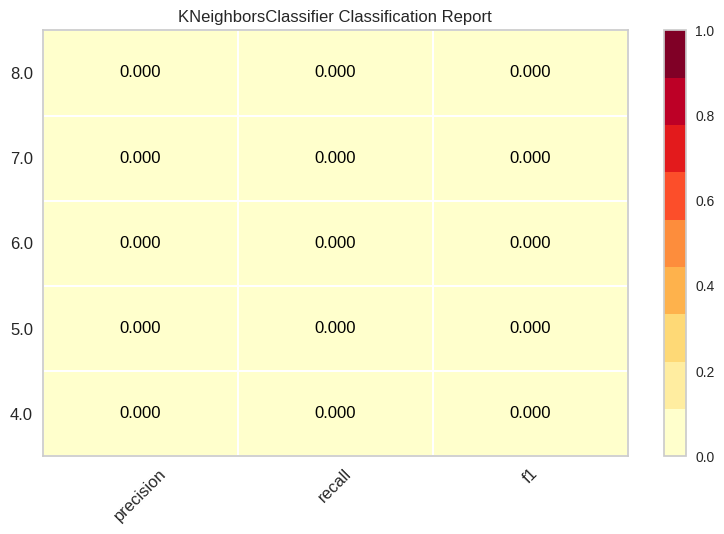

In [37]:
knn = KNeighborsClassifier(
    n_neighbors=20, 
    p=1, # minkowski default is 2
    weights='uniform',
)
visualizer = ClassificationReport(knn)
visualizer.fit(X_tr_std_red, y_tr_red)
visualizer.score(X_t_std_red, y_t_red)
fig = visualizer.show()